In [1]:
import gdown

# Enlace de la carpeta comprimida en Google Drive (debe estar configurado como público o compartir el enlace)
url = 'https://drive.google.com/uc?id=1hvuNiG-FO-0OzkbIrJ9RLxzbSrLQVSgL'
output = 'datasetLanguages.tsv'

# Descargar la carpeta comprimida
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1hvuNiG-FO-0OzkbIrJ9RLxzbSrLQVSgL
From (redirected): https://drive.google.com/uc?id=1hvuNiG-FO-0OzkbIrJ9RLxzbSrLQVSgL&confirm=t&uuid=3c0f487e-4951-4642-b805-c991cdfff174
To: /home/senorita-glez/Descargas/repositories/TranslatorBasicTransformer/Models/datasetLanguages.tsv
100%|██████████| 234M/234M [00:27<00:00, 8.47MB/s] 


'datasetLanguages.tsv'

Accuracy del modelo en el conjunto de prueba: 0.9904


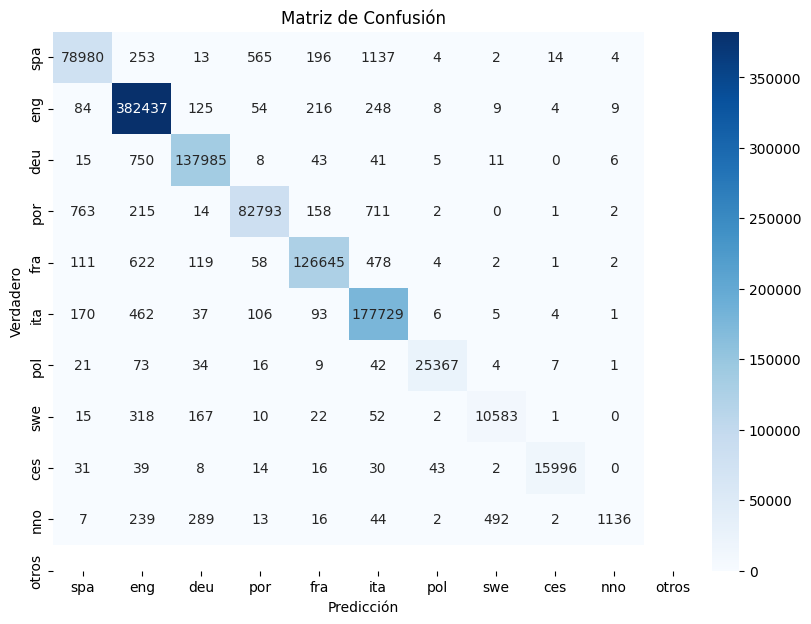

El idioma detectado es: eng
Modelo guardado en: modelo_idiomas.joblib
Modelo guardado exitosamente.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Cargar el dataset desde un archivo TSV
archivo_tsv = "datasetLanguages.tsv"  # Asegúrate de que este archivo esté en el directorio correcto
df = pd.read_csv(archivo_tsv, sep='\t', header=None, names=['etiqueta', 'frase'])

# Separar las características (frases) y las etiquetas (idiomas)
textos = df['frase'].values
etiquetas = df['etiqueta'].values

# Añadir una clase "otros" para los idiomas no incluidos en los 10 predeterminados
otros_etiquetas = -1  # Etiqueta para "otros" idiomas
# Cambiar el rango de las etiquetas para incluir "otros"
etiquetas_a_idiomas = {
    0: 'spa', 1: 'eng', 2: 'deu', 3: 'por', 4: 'fra', 5: 'ita',
    6: 'pol', 7: 'swe', 8: 'ces', 9: 'nno', 10: 'otros'
}

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%) de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(textos, etiquetas, test_size=0.2, random_state=42, stratify=etiquetas)

# Crear un pipeline de vectorización y clasificación
modelo = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3), analyzer='char')),  # Caracteres n-gramas
    ('classifier', MultinomialNB())  # Clasificador Naive Bayes
])

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Guardar el modelo entrenado en un archivo
modelo_guardado = "modelo_idiomas.joblib"
joblib.dump(modelo, modelo_guardado)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión usando seaborn para una visualización más amigable
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas_a_idiomas.values(),
            yticklabels=etiquetas_a_idiomas.values())

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Función para predecir y manejar "otros idiomas"
def predecir_idioma(texto):
    prediccion = modelo.predict([texto])[0]
    if prediccion >= 0 and prediccion < 10:
        return etiquetas_a_idiomas[prediccion]
    else:
        return 'otros'

# Ejemplo de predicción
texto_de_prueba = "hyuhknnuikm"
idioma_detectado = predecir_idioma(texto_de_prueba)
print(f"El idioma detectado es: {idioma_detectado}")

# Confirmar que el modelo ha sido guardado
print(f"Modelo guardado en: {modelo_guardado}")


import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(modelo, 'modelo_naive_bayes.pkl')
print("Modelo guardado exitosamente.")